In [1]:
#-*- coding: utf-8 -*- 
#对数据进行基本的探索
#返回缺失值个数以及最大最小值
from datetime import datetime

import pandas as pd
from matplotlib import pyplot as plt

In [2]:
datafile= 'data/air_data.xlsx' #航空原始数据,第一行为属性标签
resultfile = '../tmp/explore.xlsx' #数据探索结果表

In [3]:
data = pd.read_excel(datafile) #读取原始数据，指定UTF-8编码（需要用文本编辑器将数据装换为UTF-8编码）

In [4]:
explore = data.describe(percentiles = [], include = 'all').T #包括对数据的基本描述，percentiles参数是指定计算多少的分位数表（如1/4分位数、中位数等）；T是转置，转置后更方便查阅
explore['null'] = len(data)-explore['count'] #describe()函数自动计算非空值数，需要手动计算空值数

In [12]:

explore = explore[['null', 'max', 'min']]
explore.columns = [u'空值数', u'最大值', u'最小值'] #表头重命名
'''这里只选取部分探索结果。
describe()函数自动计算的字段有count（非空值数）、unique（唯一值数）、top（频数最高者）、freq（最高频数）、mean（平均值）、std（方差）、min（最小值）、50%（中位数）、max（最大值）'''

explore.to_excel(resultfile) #导出结果

KeyError: "None of [Index(['null', 'max', 'min'], dtype='object')] are in the [columns]"

In [17]:
#2.探索客户的基本信息分布情况
#客户信息类别
#提取会员入会年份
#提取不同级别会员的人数
lv_four = pd.value_counts(data['FFP_TIER'])[4]
lv_five = pd.value_counts(data['FFP_TIER'])[5]
lv_six = pd.value_counts(data['FFP_TIER'])[6]

<BarContainer object of 3 artists>

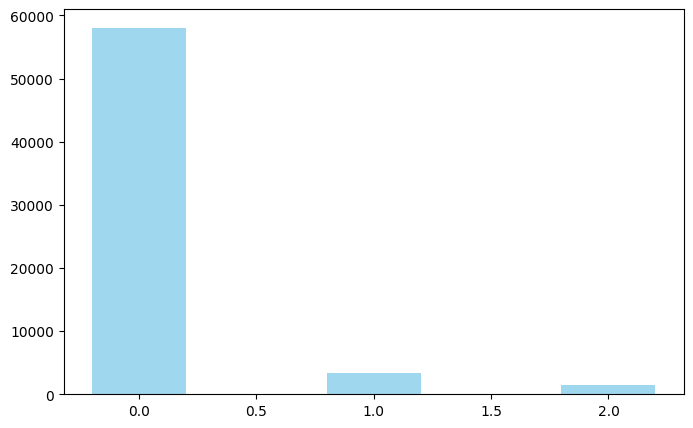

In [18]:
#绘制会员各级别人数条形图
fig = plt.figure(figsize=(8,5))  #设置画布大小
plt.bar(range(3), [lv_four, lv_five, lv_six], width=0.4, alpha=0.8, color='skyblue')
#left：x轴的位置序列，一般采用arange函数产生一个序列；
#height：y轴的数值序列，也就是柱形图的高度，一般就是我们需要展示的数据；
#alpha：透明度
#width：为柱形图的宽度，一般这是为0.8即可；
#color或facecolor：柱形图填充的颜色；

C:\Users\20887\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20250 (\N{CJK UNIFIED IDEOGRAPH-4F1A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\20887\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21592 (\N{CJK UNIFIED IDEOGRAPH-5458}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\20887\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\20887\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\20887\AppData\Local\Programs\Python\Python311\Lib\site-packages

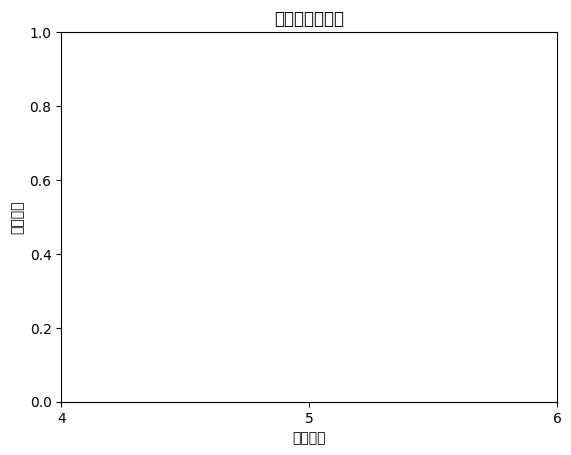

In [19]:
plt.xticks([index for index in range(3)], ['4', '5', '6'])
plt.xlabel('会员等级')
plt.ylabel('会员人数')
plt.title('会员各级别人数')
plt.show()
plt.close()